In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

from sklearn.linear_model import LinearRegression

In [2]:
cd = os.getcwd()
print(cd)

c:\Users\ADETUNJI\Documents\Data-Science-Projects\HousingPredictionProjects\notebooks


In [3]:
home_dir = r"c:\Users\ADETUNJI\Documents\Data-Science-Projects\HousingPredictionProjects"
print(home_dir)

c:\Users\ADETUNJI\Documents\Data-Science-Projects\HousingPredictionProjects


In [4]:
home_dir = r"c:\Users\ADETUNJI\Documents\Data-Science-Projects\HousingPredictionProjects"
print(home_dir)

c:\Users\ADETUNJI\Documents\Data-Science-Projects\HousingPredictionProjects


In [5]:
df = pd.read_csv(r'C:\Users\ADETUNJI\Documents\Data-Science-Projects\HousingPredictionProjects\data\raw\housing.csv')


In [6]:
# lets check the first 5 rows of the data set
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# lets check the shape of the data set
df.shape

(20640, 10)

From the above output, we can see that the data set has 20640 rows and 10 columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## EDA
We will be performing exploratory data analysis on our data. This is crucial inorder to understand our data. We will also split the data into training and testing sets. This is to avaid data leakage.

In [9]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.1, random_state=20)

In [10]:
f'The size of the training data is {train_data.shape} and the size of the test data is {test_data.shape}'

'The size of the training data is (18576, 10) and the size of the test data is (2064, 10)'

In [11]:
#create a copy of the traning data set incase we alter the data set
train_data_copy = train_data.copy()


In [12]:
# Summary Statistics of non categorical variables
train_data_copy.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,18576.0,-119.567530,2.000581,-124.3500,-121.7900,-118.4900,-118.010000,-114.4900
latitude,18576.0,35.630217,2.133260,32.5400,33.9300,34.2600,37.710000,41.9500
housing_median_age,18576.0,28.661068,12.604039,1.0000,18.0000,29.0000,37.000000,52.0000
total_rooms,18576.0,2631.567453,2169.467450,2.0000,1445.0000,2127.0000,3149.000000,39320.0000
total_bedrooms,18390.0,537.344698,417.672864,1.0000,295.0000,435.0000,648.000000,6445.0000
population,18576.0,1422.408376,1105.486111,3.0000,785.7500,1166.0000,1725.000000,28566.0000
households,18576.0,499.277078,379.473497,1.0000,279.0000,410.0000,606.000000,6082.0000
median_income,18576.0,3.870053,1.900225,0.4999,2.5643,3.5341,4.742725,15.0001
median_house_value,18576.0,206881.011305,115237.605962,14999.0000,120000.0000,179800.0000,264700.000000,500001.0000


In [13]:
#checking for missing values
train_data_copy.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

From above we can see that apart from total_bedrooms, every other column has no null value but, the missing value in total_bedrooms is 186.
Lets check the % of the mssing rows in total_bedrooms.

In [14]:
f'The percentage of missing values in the total_bedrooms column is {round(train_data_copy.total_bedrooms.isnull().sum()/len(train_data_copy)*100)}%'

'The percentage of missing values in the total_bedrooms column is 1%'

In [15]:
# Checking values of the categorical features
df.describe(include='object').transpose()

,count,unique,top,freq
ocean_proximity,20640,5,<1H OCEAN,9136


In [16]:
train_data_copy.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='count'>

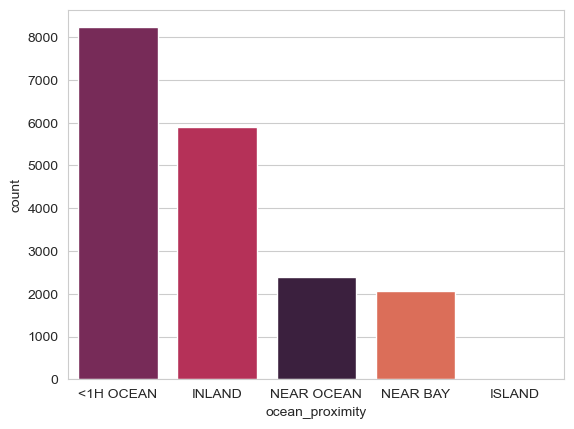

In [40]:
# bar_plot1 =
sns.countplot(data=train_data_copy, x='ocean_proximity',hue='ocean_proximity', palette='rocket',order=train_data_copy['ocean_proximity'].value_counts().index, orient='v')
# bar_plot1= bar_plot1.set_title('Ocean Proximity')
# plt.xlabel("Ocean Proximity")
# plt.ylabel("Count")
# plt.title("Distribution Ocean proximity")  # Optional title

# # Show the plot
# plt.show()

## Checking Correlation Between Features

In [19]:
# Ocean proximity will be dropped as it is a categorical variable

df_train_data_copy = train_data_copy['ocean_proximity']
train_data_copy.drop(columns=['ocean_proximity'], inplace=True)
correlation = train_data_copy.corr()
correlation['median_house_value']

longitude            -0.048622
latitude             -0.142543
housing_median_age    0.105237
total_rooms           0.133927
total_bedrooms        0.049672
population           -0.026109
households            0.065508
median_income         0.685433
median_house_value    1.000000
Name: median_house_value, dtype: float64

<Axes: >

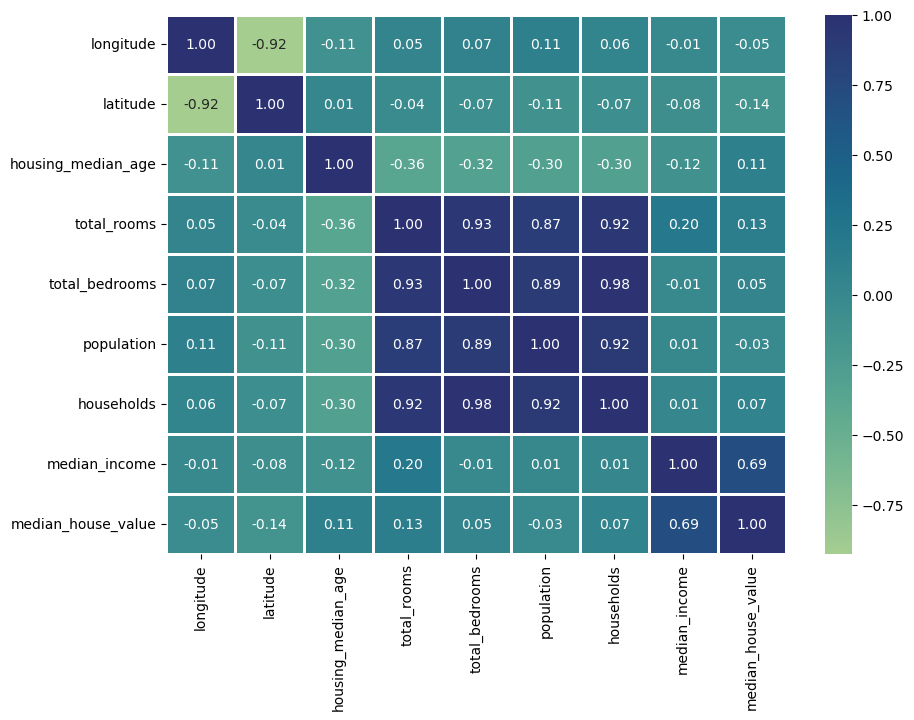

In [20]:
# Visualizing the correlation matrix

plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, cmap='crest', fmt='.2f', linewidths=2)

### From the correlation matrix, since we want to predict the median home value and it is our target value, our concentration will be on columns that correlates highly with it.
1. Median income of the household has high correlation with median house value at 70%. Which makes sense beacuse you will go for a house you can affored.



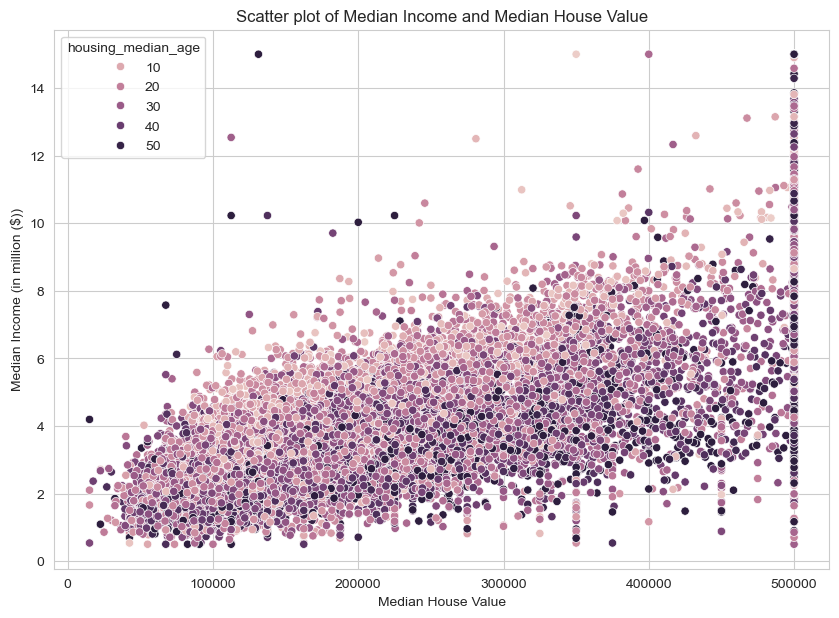

In [ ]:
### Plot a scatter plot of highly correlated variables with the median house value. 
#Note that the median income is in  millions
plt.figure(figsize=(10, 7))
sns.scatterplot(data=train_data_copy, y='median_income', x='median_house_value', hue='housing_median_age')
plt.ylabel('Median Income (in million ($))')
plt.xlabel('Median House Value')
plt.title('Scatter plot of Median Income and Median House Value')
plt.show()

In [ ]:
### We will be working on geographical data so we will be using the longitude and latitude columns to create a scatter plot of the data
# I will be concatenating the ocean_proximity column to the train_data_copy data set to visualize the data
train_data_copy = pd.concat([train_data_copy, df_train_data_copy], axis=1)



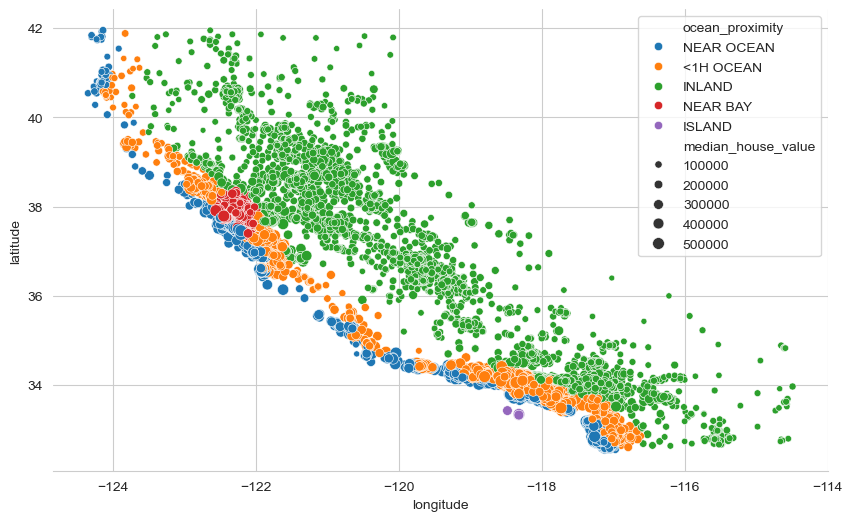

In [50]:
train_data_copy
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.scatterplot(data=train_data_copy, x='longitude', y='latitude', size='median_house_value', hue='ocean_proximity')
sns.despine(left='true')


### Observation

Houses that are close to waters are more expensive when compared to the circle of inland.

### Data Processing

In this part, both the training and the test data will be processed and every step taken in processing the training data, will also be taken for the test data.

They are 3 major steps to be taken majorly when getting or precessing data.
1. Replace missing values
2. Encodeing categorical feautures.
3. Scalling numerical features

Next step is to create an input training data and training label, the label here is median_house_value, that is what we are trying to predict.


In [51]:
training_input_data = train_data_copy.drop(columns=['median_house_value'])
training_label_data = train_data_copy['median_house_value']

In [52]:
training_input_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8101,-118.21,33.80,41.0,1251.0,279.0,1053.0,278.0,3.2778,NEAR OCEAN
9757,-121.44,36.51,31.0,1636.0,380.0,1468.0,339.0,3.2219,<1H OCEAN
16837,-122.48,37.59,29.0,5889.0,959.0,2784.0,923.0,5.3991,NEAR OCEAN
11742,-121.15,38.91,23.0,1654.0,299.0,787.0,299.0,4.2723,INLAND
1871,-119.95,38.94,24.0,2180.0,517.0,755.0,223.0,2.5875,INLAND


In [53]:
training_label_data.head()

8101     150800.0
9757     114700.0
16837    273000.0
11742    193100.0
1871     173400.0
Name: median_house_value, dtype: float64

### Manipulating Missing Data

Missing data are always there and linear regression is usually affeted by missing values unlike tree based models

In [55]:
# Checking for missing values in the training input data
training_input_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [ ]:
# what is the % of the missing values in the total_bedrooms column
f'The percentage of missing values in the total_bedrooms column is {round(training_input_data.total_bedrooms.isnull().sum()/len(training_input_data)*100)}%'

'The percentage of missing values in the total_bedrooms column is 1%'

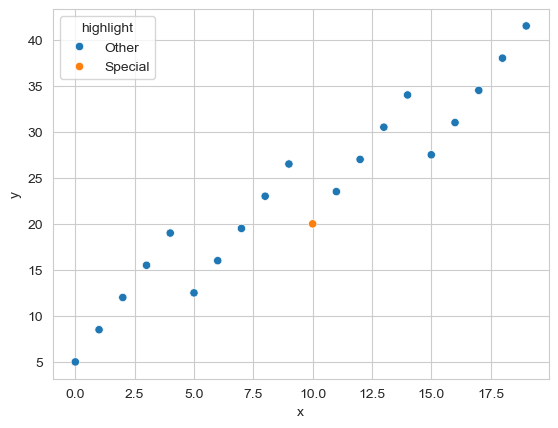

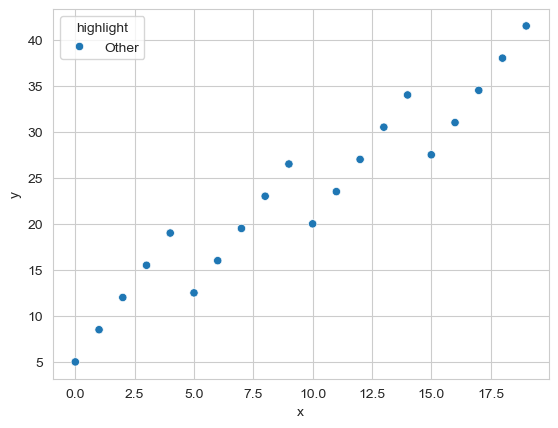

In [54]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your data)
data = {'x': range(20), 'y': [i*1.5 + 5 + (i%5)*2 for i in range(20)]}
df = pd.DataFrame(data)

# Condition to identify the special point(s)
special_condition = (df['x'] == 10)  # Example: x-value is 10

# Create a 'highlight' column
df['highlight'] = ['Other' if not cond else 'Special' for cond in special_condition]

# Create the scatterplot
sns.scatterplot(x='x', y='y', hue='highlight', data=df)
plt.show()


# More complex conditional highlighting
df['highlight'] = 'Other'
df.loc[(df['x'] > 5) & (df['y'] < 15), 'highlight'] = 'Special' # Multiple conditions
sns.scatterplot(x='x', y='y', hue='highlight', data=df)
plt.show()

### From the figure above, 